# Jupyter Notebook

## Como instalar sem sair do notebook

 É possilvel instalar pacotes no próprio notebook

- !pip3 install numpy

### Aceita linguagem de programação e markdown

In [36]:
def ola():
    print("Olá Mundo")

In [38]:
ola()

Olá Mundo


In [39]:
ola = "Olá mundo"
ola

'Olá mundo'

### Análise dados Enem 2019

In [40]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


In [41]:
import seaborn as sns

#### Dados INEP https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

In [42]:
reader = pd.read_csv("MICRODADOS_ENEM_2019.csv", sep=';',encoding='ISO-8859-1', chunksize=500, iterator=True)

In [43]:
dados = reader.get_chunk()

In [44]:
dados.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A
5,190001004632,2019,1500800,Ananindeua,15,PA,31,M,1,1,...,A,A,A,B,A,A,D,A,A,A
6,190001004633,2019,1504208,Marabá,15,PA,30,F,2,3,...,A,A,A,B,A,A,B,A,A,B
7,190001004634,2019,1501402,Belém,15,PA,26,F,0,3,...,A,A,A,B,A,A,B,A,A,A
8,190001004635,2019,1503606,Itaituba,15,PA,19,M,1,3,...,A,A,A,A,A,A,C,A,A,B
9,190001004636,2019,1507607,São Miguel do Guamá,15,PA,17,F,1,2,...,A,A,A,B,A,A,B,A,A,A


In [45]:
dados.shape

(500, 136)

In [8]:
dados.keys()

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [46]:
reader2 = pd.read_csv("MICRODADOS_ENEM_2019.csv", sep=';',
                      chunksize=1000,
                     usecols=['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESTADO_CIVIL', 'NU_NOTA_MT'])

In [48]:
dadosAtualizados = reader2.get_chunk()

In [50]:
dadosAtualizados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_MT
1000,190001005627,PA,18,F,0,3,401.2
1001,190001005628,PA,25,M,1,2,667.6
1002,190001005629,PA,20,F,1,2,486.9
1003,190001005630,PA,17,F,1,3,460.5
1004,190001005631,PA,18,M,1,3,455.6


In [51]:
dadosAtualizados.shape

(1000, 7)

In [52]:
dados2 = dadosAtualizados.groupby([
    'NU_INSCRICAO',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'TP_SEXO',
    'TP_COR_RACA',
    'TP_ESTADO_CIVIL'], as_index=False)['NU_NOTA_MT'].mean().dropna()

In [53]:
dados2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,NU_NOTA_MT
0,190001005627,PA,18,F,3,0,401.2
1,190001005628,PA,25,M,2,1,667.6
2,190001005629,PA,20,F,2,1,486.9
3,190001005630,PA,17,F,3,1,460.5
4,190001005631,PA,18,M,3,1,455.6


In [54]:
estado_civil = 'NãoInformado Solteiro(a) Casado(a) Separado(a) Viúvo(a)'.split(' ')
coluna = 'TP_ESTADO_CIVIL'

for i in range(4):
    alter = dados2[coluna] == i
    dados2.loc[alter, coluna] = estado_civil[i]

In [55]:
dados2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,NU_NOTA_MT
0,190001005627,PA,18,F,3,NãoInformado,401.2
1,190001005628,PA,25,M,2,Solteiro(a),667.6
2,190001005629,PA,20,F,2,Solteiro(a),486.9
3,190001005630,PA,17,F,3,Solteiro(a),460.5
4,190001005631,PA,18,M,3,Solteiro(a),455.6


In [56]:
dados2['TP_COR_RACA'] = dados2['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

In [57]:
dados2.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,NU_NOTA_MT
0,190001005627,PA,18,F,Parda,NãoInformado,401.2
1,190001005628,PA,25,M,Preta,Solteiro(a),667.6
2,190001005629,PA,20,F,Preta,Solteiro(a),486.9
3,190001005630,PA,17,F,Parda,Solteiro(a),460.5
4,190001005631,PA,18,M,Parda,Solteiro(a),455.6


In [58]:
dadosSaved = dados2

### Exibindo dados no gráfico

In [59]:
#porcentagem de cada sexo na amostra
dados2['TP_SEXO'].value_counts()/dados2.shape[0]*100

F    64.668367
M    35.331633
Name: TP_SEXO, dtype: float64

In [60]:
dados2['TP_COR_RACA'].value_counts()/dados2.shape[0]*100

Parda       67.346939
Branca      16.581633
Preta       11.096939
Amarela      2.423469
NA           2.295918
Indígena     0.255102
Name: TP_COR_RACA, dtype: float64

* **countplot** Exibe as contagens de observações em cada categoria categórica usando barras.

/home/fabricio/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


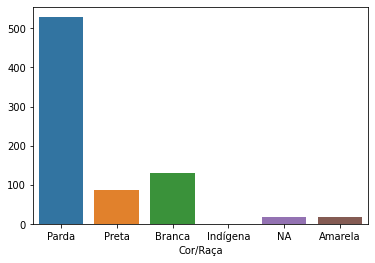

In [61]:
sns.countplot(dados2['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show()

/home/fabricio/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


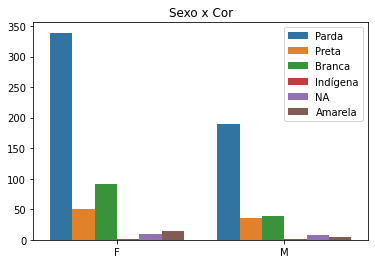

In [62]:
sns.countplot(dados2['TP_SEXO'],hue=dados2['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show()

* Seaborn distplot permite mostrar um histograma com uma linha

/home/fabricio/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

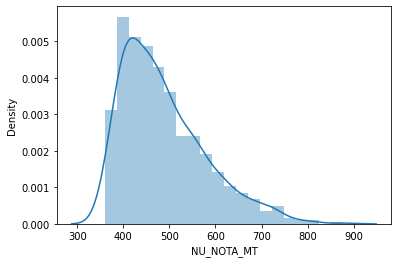

In [63]:
sns.distplot(dados2['NU_NOTA_MT'])

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Count'>

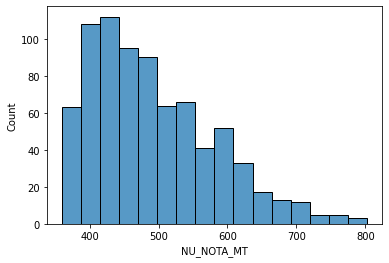

In [25]:
sns.histplot(dados2['NU_NOTA_MT'])

### Relação Idade x Nota_matematica

* **jointplot** exibe uma relação entre 2 variáveis ​​(bivariada), bem como perfis 1D (univariada) nas margens

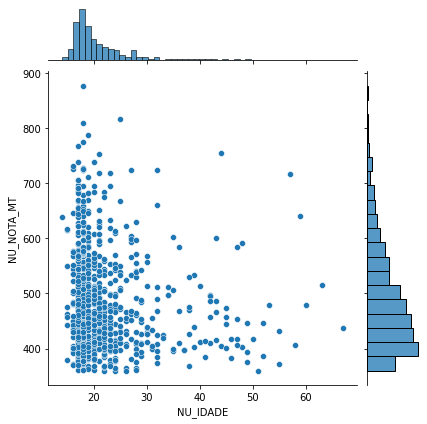

In [64]:
sns.jointplot(data=dados2, x='NU_IDADE', y='NU_NOTA_MT')

### Relação Idade x Nota_matematica - relacionada com estado civil

* **lmplot()** é um gráfico de dispersão 2D com uma linha de regressão sobreposta opcional 

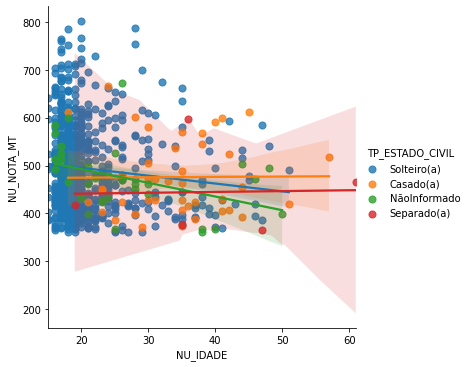

In [27]:
sns.lmplot(data=dados2, x='NU_IDADE', y='NU_NOTA_MT', hue='TP_ESTADO_CIVIL', scatter_kws={'s': 50})

* **describe()** visualizar alguns detalhes estatísticos básicos como percentil, média, padrão

In [28]:
dadosSaved.describe()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_MT
count,7.790000e+02,779.000000,779.000000
mean,1.900010e+11,21.982028,491.517073
std,2.874790e+02,7.180177,89.555733
min,1.900010e+11,15.000000,360.400000
25%,1.900010e+11,18.000000,420.100000
50%,1.900010e+11,19.000000,472.500000
75%,1.900010e+11,23.000000,548.600000
max,1.900010e+11,61.000000,801.900000


* **hist()** Um histograma é uma representação da distribuição de dados. 

<AxesSubplot:>

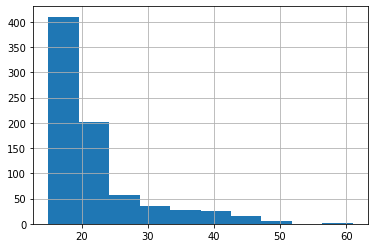

In [29]:
dadosSaved['NU_IDADE'].hist()

<AxesSubplot:>

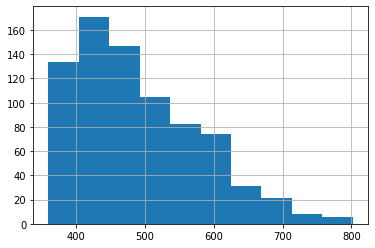

In [30]:
dadosSaved['NU_NOTA_MT'].hist()

* **skew()** calcular a simetria dos dados

In [31]:
dadosSaved.skew()

NU_INSCRICAO    0.005502
NU_IDADE        2.063272
NU_NOTA_MT      0.819279
dtype: float64

* **corr()** calcular a correlação entre todas as colunas do dataset.

In [32]:
dadosSaved.corr()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_MT
NU_INSCRICAO,1.000000,0.067155,0.027770
NU_IDADE,0.067155,1.000000,-0.128954
NU_NOTA_MT,0.027770,-0.128954,1.000000


* método **std()** calcula o desvio padrão da coluna.

In [33]:
dadosSaved.std()

NU_INSCRICAO    287.478963
NU_IDADE          7.180177
NU_NOTA_MT       89.555733
dtype: float64

In [65]:
dadosSaved['NU_IDADE'].mean()

22.224489795918366

In [35]:
dadosSaved['NU_IDADE'].max()

61